Dokumentasi: 
https://nbviewer.jupyter.org/github/jmportilla/Statistics-Notes/blob/master/Poisson%20Distribution.ipynb

Let's say a McDonald's has a lunch rush from 12:30pm to 1:00pm. From looking at customer sales from previous days, we know that on average 10 customers enter during 12:30pm to 1:00pm. What is the probability that exactly 7 customers enter during lunch rush? What is the probability that more than 10 customers arrive?

Let's begin by thinking about how many customers we expect to come into McDonald's during lunch rush. Well we were actually already given that information, it's 10. This means that the mean is 10, then our expected value E(X)=10. In the Poisson distribution this is λ. So the mean = λ for a Poisson Distribution, it is the expected number of occurences over the specfied interval.

In [4]:
# Note do not use lambda as an object name in python! It is already used for special lambda functions in Python!!

#lambda dalam hal ini sama dengan mean 
lamb = 10 
#k adalah jumlah muncul yang diinginkan
k = 7 

#set up e and factorial statement
from math import exp
from math import factorial

#put the probability mass function
prob = (lamb**k)*exp(-lamb)/factorial(k)

print('There is a %2.2f %% chance that exactly 7 customers show up at the lunch rush' %(100*prob))

There is a 9.01 % chance that exactly 7 customers show up at the lunch rush


In [7]:
#Mencari PMF secara automatis
from scipy.stats import poisson 

# Set our mean = 10
mu = 10

#nilai mu seharusnya sama dengan nilai yang didapat dengan menggunakan scipy di bawah
mean, var = poisson.stats(mu)

#calculate PMF 
odds_seven = poisson.pmf(7,mu)

print('There is a %2.2f %% chance that exactly 7 customers show up at the lunch rush' %(100*odds_seven))

#print the mean 
print('The mean is %2.2f' %mean)

There is a 9.01 % chance that exactly 7 customers show up at the lunch rush
The mean is 10.00


#### See entire distribution

In [11]:
import numpy as np 

#melihat kemungkinan hingga 30 customer show up pada time interval 
k = np.arange(30)

#mean dari time interval 
lamb = 10 

#melihat pmf poisson dari masing2 nilai
pmf_pois = poisson.pmf(k, lamb)

#jika pmf_pois di-print maka akan menghasilkan list yang berisi pmf dari tiap nilai 

<BarContainer object of 30 artists>

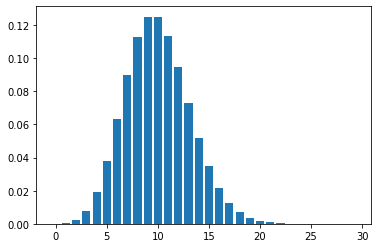

In [12]:
#plot the pmf 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.bar(k, pmf_pois)

What is the probability that more than 10 customers arrive?

In [16]:
#We need to sum up the value of every bar past 10 the 10 customers bar

#We can do this by using a Cumulative Distribution Function (CDF)

k, mu = 10,10 

prob_up_to_ten = poisson.cdf(k,mu)

print('The probability that 10 or less customers show up is %2.1f %%.' %(100*prob_up_to_ten))

The probability that 10 or less customers show up is 58.3 %.


Now we can answer the question for more than 10 customers. It will be the remaining probability space

In [18]:
prob_more_than_ten = 1 - prob_up_to_ten

print('The probability that more than ten customers show up during lunch rush is %2.1f %%.' %(100*prob_more_than_ten))

The probability that more than ten customers show up during lunch rush is 41.7 %.


Dokumentasi tambahan: 

1.)http://en.wikipedia.org/wiki/Poisson_distribution#Definition

2.)http://stattrek.com/probability-distributions/poisson.aspx

3.)http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

### Normal Distribution

Dokumentasi lengkap: 
https://nbviewer.jupyter.org/github/jmportilla/Statistics-Notes/blob/master/Normal%20Distribution.ipynb

For the normal distribution, we can see what percentage of values lie between +/- a standard deviation. 68% of the values lie within 1 TSD, 95% between 2 STDs, and 99.7% between 3 STDs. The number of standard deviations is also called the z-score.

In [19]:
#Penjelasan lebih lengkap mengenai normal distribution
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/thumb/2/25/The_Normal_Distribution.svg/725px-The_Normal_Distribution.svg.png')

Terlihat bahwa, memang Z scores merupakan number dari standard deviations. Tapi apa itu T-scores? Sepertinya kita akan mempelajarinya lagi nanti

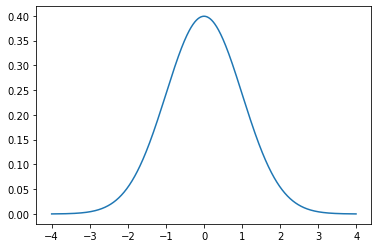

In [26]:
#Use scipy to create normal distribution

import matplotlib as mpl 
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

mean = 0 
std = 1

#membuat nilai X 
#Dari -4 sampai dengan 4 dengan selisih 0.01 setiap bergerak
X = np.arange(-4,4,0.01)

Y = stats.norm.pdf(X,mean,std)

plt.plot(X,Y)

Now let's learn how to use numpy to create the normal distribution.

In [36]:
import numpy as np

#set the mean and standard deviation
mu, sigma = 0, 0.1

# Now grab 1000 random numbers from the normal distribution
norm_set = np.random.normal(mu,sigma,1000)

(array([ 1.,  0.,  0.,  2.,  2.,  1.,  2.,  0.,  8.,  7.,  8., 12., 11.,
        12., 12., 18., 33., 32., 36., 45., 39., 50., 59., 56., 42., 43.,
        45., 41., 58., 55., 34., 41., 33., 32., 18., 22., 26.,  9., 10.,
        15.,  5.,  5.,  5.,  4.,  5.,  1.,  1.,  0.,  3.,  1.]),
 array([-0.33846797, -0.32526491, -0.31206184, -0.29885877, -0.28565571,
        -0.27245264, -0.25924957, -0.2460465 , -0.23284344, -0.21964037,
        -0.2064373 , -0.19323424, -0.18003117, -0.1668281 , -0.15362504,
        -0.14042197, -0.1272189 , -0.11401584, -0.10081277, -0.0876097 ,
        -0.07440664, -0.06120357, -0.0480005 , -0.03479744, -0.02159437,
        -0.0083913 ,  0.00481176,  0.01801483,  0.0312179 ,  0.04442096,
         0.05762403,  0.0708271 ,  0.08403017,  0.09723323,  0.1104363 ,
         0.12363937,  0.13684243,  0.1500455 ,  0.16324857,  0.17645163,
         0.1896547 ,  0.20285777,  0.21606083,  0.2292639 ,  0.24246697,
         0.25567003,  0.2688731 ,  0.28207617,  0.29527923,

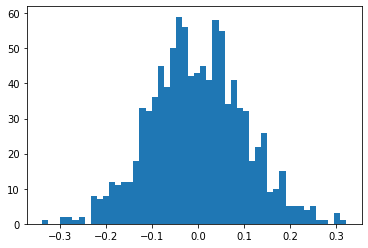

In [37]:
#plot it using seaborn 
import seaborn as sns

plt.hist(norm_set, bins=50)

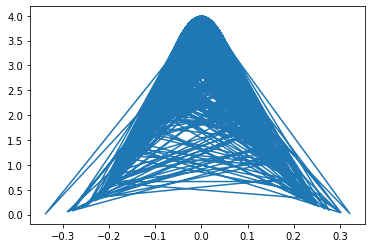

In [38]:
#masih tidak mengetahui, kenapa kalau pakai pdf jadinya aneh? 
y = stats.norm.pdf(norm_set, mu, sigma)

#terlihat sangat aneh
plt.plot(norm_set, y)

(array([16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.]),
 array([-4.    , -3.8402, -3.6804, -3.5206, -3.3608, -3.201 , -3.0412,
        -2.8814, -2.7216, -2.5618, -2.402 , -2.2422, -2.0824, -1.9226,
        -1.7628, -1.603 , -1.4432, -1.2834, -1.1236, -0.9638, -0.804 ,
        -0.6442, -0.4844, -0.3246, -0.1648, -0.005 ,  0.1548,  0.3146,
         0.4744,  0.6342,  0.794 ,  0.9538,  1.1136,  1.2734,  1.4332,
         1.593 ,  1.7528,  1.9126,  2.0724,  2.2322,  2.392 ,  2.5518,
         2.7116,  2.8714,  3.0312,  3.191 ,  3.3508,  3.5106,  3.6704,
         3.8302,  3.99  ]),
 <a list of 50 Patch objects>)

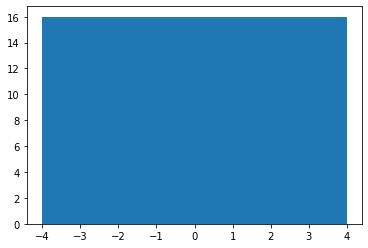

In [39]:
#pasti hasilnya sama lah, kan juga normal distribution
plt.hist(X, bins=50)

Masih perlu mempelajari lebih banyak mengenai Normal Distribution. Beberapa link yang membantu: 

1.)http://en.wikipedia.org/wiki/Uniform_distribution_%28continuous%29

2.)http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html

3.)http://mathworld.wolfram.com/UniformDistribution.html

#### Bahan bacaan untuk Sampling: 

1. https://nbviewer.jupyter.org/github/jmportilla/Statistics-Notes/blob/master/Sampling%20Techniques.ipynb
2. https://docs.python.org/2/library/random.html
3. https://en.wikipedia.org/wiki/Sampling_distribution

### T Distribution

Dokumentasi lengkap: 
https://nbviewer.jupyter.org/github/jmportilla/Statistics-Notes/blob/master/T%20Distribution%20%28Small%20Sampling%20Theory%29.ipynb

The t-distribution allows for use of small samples, but does so by sacrificing certainty with a margin-of-error trade-off. 

The t-distribution takes into account the sample size using n-1 degrees of freedom, which means there is a different t-distribution for every different sample size. If we see the t-distribution against a normal distribution, you'll notice the tail ends increase as the peak get 'squished' down.

It's important to note, that as n gets larger, the t-distribution converges into a normal distribution.

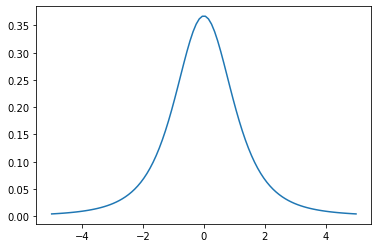

In [11]:
#Get t-distribution using python 
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import t

import numpy as np

# -5 dan 5 merupakan range, 100 merupakan adalah ada berapa banyak elemen yang kita inginkan
# kalau kita print panjang dari x, maka akan menghasilkan 100
x = np.linspace(-5,5,100)

#3 merupakan degree of freedom? 
rv = t(3)

plt.plot(x, rv.pdf(x))

Resource tambahan: 

1.) http://en.wikipedia.org/wiki/Student%27s_t-distribution

2.) http://mathworld.wolfram.com/Studentst-Distribution.html

3.) http://stattrek.com/probability-distributions/t-distribution.aspx

Sejauh ini saya masih belum mengerti mengapa t distribution membutuhkan degree of freedom, serta kenapa distribusi lain tidak membutuhkannya.

### Hypothesis Testing & Standard Distribution 

Dokumentasi: 
https://nbviewer.jupyter.org/github/jmportilla/Statistics-Notes/blob/master/Hypothesis%20Testing%20and%20Confidence%20Intervals.ipynb
    
Resource lebih lanjut: 

1.) https://en.wikipedia.org/wiki/Statistical_hypothesis_testing

2.) https://stattrek.com/hypothesis-test/hypothesis-testing.aspx

3.) https://mathworld.wolfram.com/HypothesisTesting.html

4.) https://www.sagepub.com/sites/default/files/upm-binaries/40007_Chapter8.pdf